# Security Historical Returns

The main aim of this study is to provide statistical information on investment returns. In particular, when a time horizon is selected (for example 10 or 20 years), historical price data is used to provide statistical information (distribution, mean, median, max, min, etc.) on the expected returns. The approach used in this analysis differs from the typical return calculation. The main idea behind the approach introduced in the following sections, is that the investment starting day is random, and not at the beginning/end of each month, quanrter or year.
<br><br>
__INDEX:__
- ___0. Libraries___


- ___1. Input___
- 1.1. Input Setup
- 1.2. Historical Price Data Download


- ___2. Annualized Returns___
- 2.1. Annualized Return Graphs
- 2.2. Annualized Return Statistical Information
- 2.3. Return Distribution Graphs
- 2.4. Returns Versus Investment Horizon


- ___3. Returns Grouped by Investment Horizon (Boxplot)___
- 3.1. Returns for Nth-Decade Investment Horizon
- 3.2. Return Distributions for Nth-Decade Investment Horizon


- ___4. Conclusions___
- 4.1. Findings
- 4.2. Future Developments
- 4.3. Example of Expected Return

## 0. Libraries
In this section the libraries used in this Notebook are imported.

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

__WARNING__: Yfinance package needs to be updated. Before running any analysis it is necessary check that the latest version of the package is installed. Use the following link https://pypi.org/project/yfinance/ to check the latest available version.

In [2]:
# Yfinance currently installed. Refer to link above for the latest version available. 
yf.__version__

'0.2.13'

In [ ]:
# Inf YFinance need to be installed, find the folder where "yfinance" folder is located:
# "C:\Users\enric\anaconda3\Lib\site-packages", but path depends on computer
# Delete the current "yfinance-X-X.XX" folder, where X is the outdated version.
# Download the most recent folder with installation files and copy it in the same folder "yfinance-Y.Y.YY"
# Remove the "#" in the line below to install the new version.

# pip install yfinance

## 1. Input Information 
In this section main info is defined. This section includes the input of Security (ETF, Fund, Stocks and Bonds) ticker that is considered in the analysis. Here also the historical price data is downloaded using _yfinance_ Python library.

### 1.1. Input Setup
In this section the _Security_ (ETF, Fund, Stock or Bond) tickers is defined. Change tickers as needed. In addition, different time horizons can be defined (in years) as well.

In [3]:
# Input information
thicker = '^GSPC' # This should be the benchmark

# Max time horizon, in years
max_year = 30

periods = np.linspace(1,max_year,endpoint=True,num=max_year,dtype=int) # Create array with time horizons

rf_rate = 0.03

### 1.2. Historical Price Data Download
In this section the historical price data is downloaded using yFinance library. Only __close price__ is used in the evaluation below.

In [4]:
# Historical data is read and the overlapping timeframe is considered and used later in the analysis
df = yf.download(thicker) # Raw DafaFrame
df.to_csv(thicker+'_RawData.csv') # Raw data is saved in a csv for record
t = df.index
t_min = df.index.min()
t_max = df.index.max()
print('Time frame considered:\nPeriod starts on',t_min.strftime('%m/%d/%Y'),
      '\nPeriod ends on',t_max.strftime('%m/%d/%Y'))
print('Timeframe is',(t_max-t_min).days,'days (',round((t_max-t_min).days/365,2),'years )')

[*********************100%***********************]  1 of 1 completed
Time frame considered:
Period starts on 12/30/1927 
Period ends on 03/24/2023
Timeframe is 34783 days ( 95.3 years )


## 2. Annualized Returns
The ___Annualized Returns___ are calculated for different horizons (time frames). As mentioned in the abstract, in this analysis the way the returns are calculated differ from the conventional methods used in finance. For an investment horizons of (n) years, the annualized return is here calculated as:
<br><br>
$Annualized Return = (\frac{Price_{i}}{Price_{i-tf}})^{(1/n)}-1$
<br><br>
where:
<br> - __Price(i)__ is the closing price at time (i), i.e. at the end of the considered time horizon
<br> - __Price(i-tf)__ is the closing price at time (i-tf), i.e. at the beginning of the considered time horizon
<br> - __tf__ is the timeframe (horizon) considered and equal to (i - 252 x n)

__NOTE__: Nominally, there are 252 trading days in a solar year.

In [5]:
# One year is approximately equal to 252 days in the DataFrame since weekends and holidays are not included in the data
for n in periods:
    df['Ann. Return for '+ str(n) + '-y period'] = ( (df['Close'] / df['Close'].shift(n*252) ) ** (1/n) - 1 ) *100

# After the returns are computed, raw initail data is removed
df.drop(columns=df.columns[0:6], axis=1,  inplace=True)

### 2.1. Annualized Return Graphs
Annualized returns for different time horizons are shown in the graph below. The graph should be read as follow: when a specific date (example: DD/MM/YY) and time frame (example: N-years) are selected, the related point in the graph represent the annualized return on DD/MM/YYYY as if the money was invested N-years ago.

As the graph shows, when the horizon increases, the returns tend to become more "stable" or, in other word, less volatile.

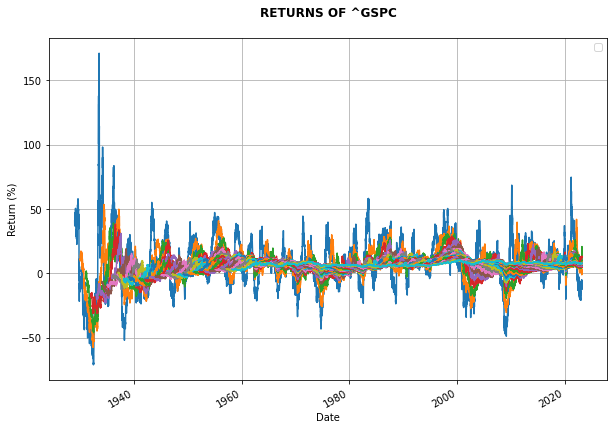

In [6]:
# This part is to plot, for each equity separately, the calcuated returns
df.iloc[:,0:].plot(figsize=(10,7),legend=None)
plt.ylabel('Return (%)')
plt.title('RETURNS OF '+ thicker +'\n',fontweight='bold')
plt.legend('')
plt.grid()
plt.show()

### 2.2. Annualized Return Statistical Information
When the annualized returns are available, the related statistical information (i.e. mean, standard deviation, etc.) is calculated. Note that if the historical data is shorter that the time frame selected, the returns are not calculated. This situation happens when the data is limited i.e. prices are available only for a few years, and some of the horizons are longer. This can be correct modifying the setup in _Section 1_ above. The table below clearly shows this: when the time horizon increases, the data point necessarily decreases, "wakening" the meaning of statistical information.

In [7]:
round(df.describe(),2)

,Ann. Return for 1-y period,Ann. Return for 2-y period,Ann. Return for 3-y period,Ann. Return for 4-y period,Ann. Return for 5-y period,Ann. Return for 6-y period,Ann. Return for 7-y period,Ann. Return for 8-y period,Ann. Return for 9-y period,Ann. Return for 10-y period,...,Ann. Return for 21-y period,Ann. Return for 22-y period,Ann. Return for 23-y period,Ann. Return for 24-y period,Ann. Return for 25-y period,Ann. Return for 26-y period,Ann. Return for 27-y period,Ann. Return for 28-y period,Ann. Return for 29-y period,Ann. Return for 30-y period
count,23670.00,23418.00,23166.00,22914.00,22662.00,22410.00,22158.00,21906.00,21654.00,21402.00,...,18630.00,18378.00,18126.00,17874.00,17622.00,17370.00,17118.00,16866.00,16614.00,16362.00
mean,7.83,6.75,6.41,6.38,6.49,6.52,6.54,6.57,6.56,6.55,...,6.89,6.94,7.00,7.05,7.09,7.12,7.13,7.12,7.10,7.09
std,20.17,13.62,10.95,9.43,7.95,6.76,6.02,5.62,5.43,5.26,...,2.89,2.71,2.55,2.35,2.14,1.95,1.78,1.66,1.59,1.47
min,-71.07,-57.52,-46.03,-31.03,-22.94,-17.47,-10.78,-12.60,-11.62,-9.80,...,-2.32,-1.54,-1.01,-1.09,0.21,1.36,1.27,0.83,1.64,1.96
25%,-4.05,0.70,1.34,1.44,1.46,1.74,2.26,2.47,2.56,2.87,...,5.11,5.28,5.58,5.79,5.83,5.90,5.95,6.05,6.11,6.16
50%,8.99,7.82,7.83,7.52,7.62,7.31,6.80,6.84,7.08,7.23,...,6.83,6.96,6.91,7.06,7.22,7.25,7.30,7.28,7.32,7.22
75%,19.89,15.19,12.99,12.21,11.62,11.03,11.25,11.37,10.96,10.90,...,8.96,8.74,8.72,8.55,8.26,8.24,8.23,8.23,8.15,8.12
max,171.11,53.52,39.21,38.27,31.09,22.85,19.54,19.13,18.77,17.17,...,13.82,13.59,12.80,12.80,13.08,13.02,11.33,10.37,10.82,10.74


### 2.3. Return Distribution Graphs
In the graphs below the distribution of returns for the considered security, related to different time horizons, are reported. Both histograms and underlying distributions are reported.

__NOTE__: Usually, a normal distribution should not be expected.

In [8]:
# Below the setup for graph. They can modified as needed:
all_graph_same_limit = 'Yes' # Value: 'Yes'/'No'
auto_limits = 'No' # Value: 'Yes'/'No'
x_min, x_max = -20, 20 # Custom value for intervals in X-limits are custom
density_type = True # 'True'/'False'

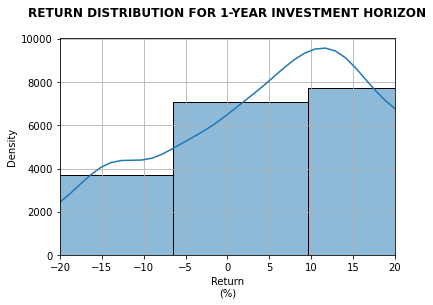

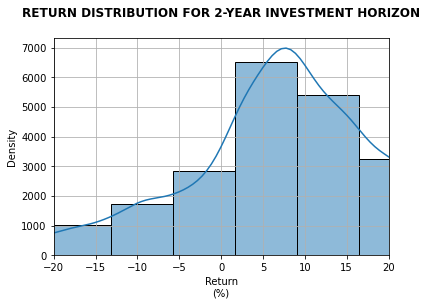

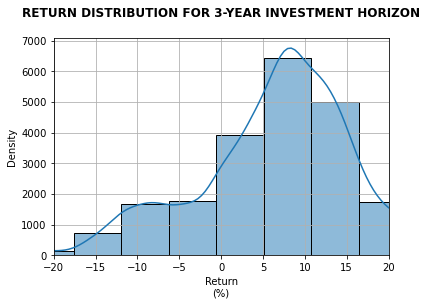

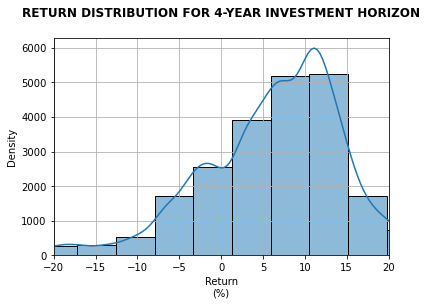

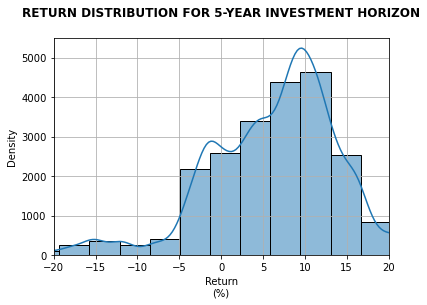

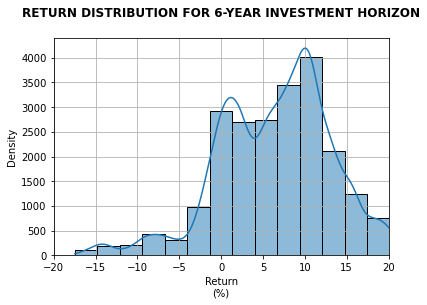

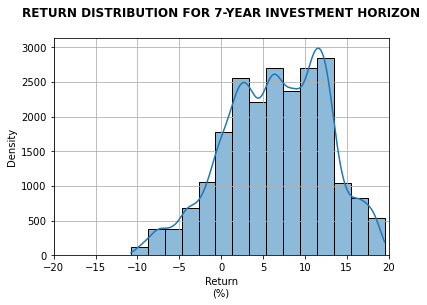

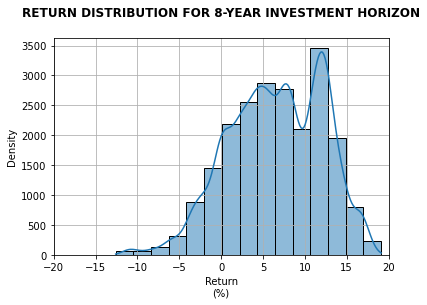

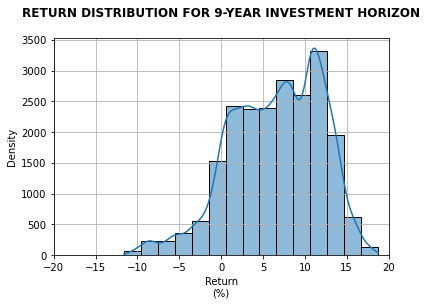

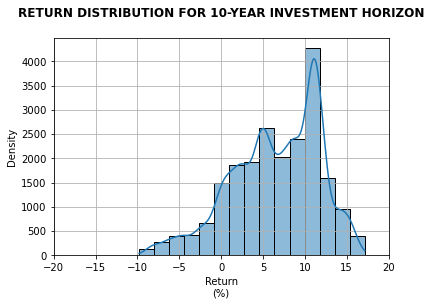

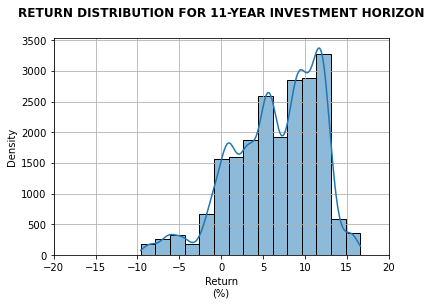

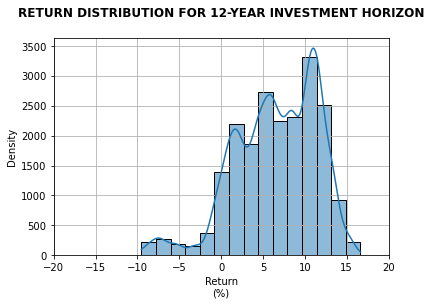

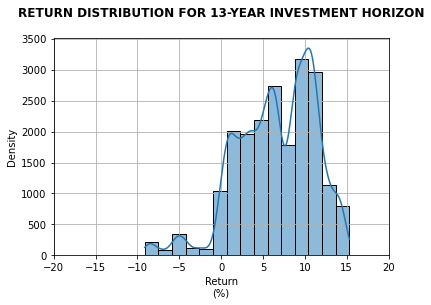

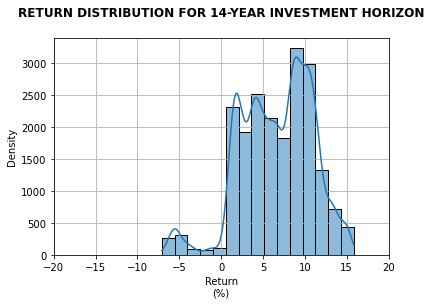

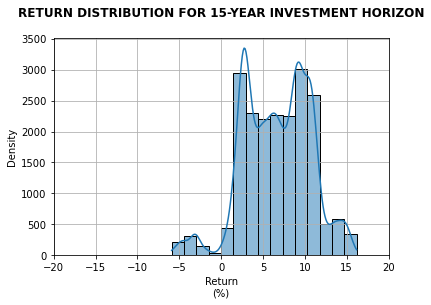

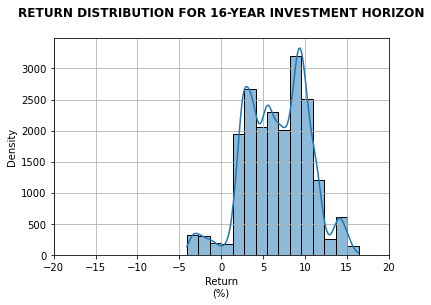

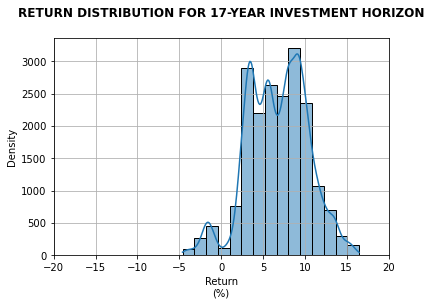

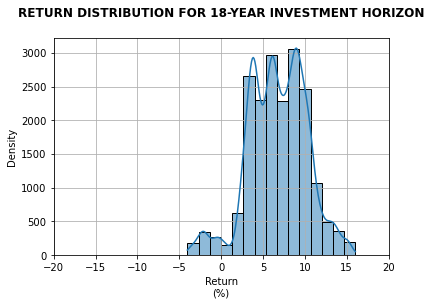

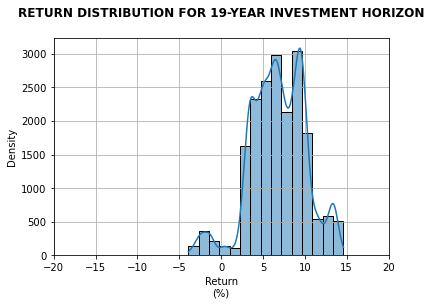

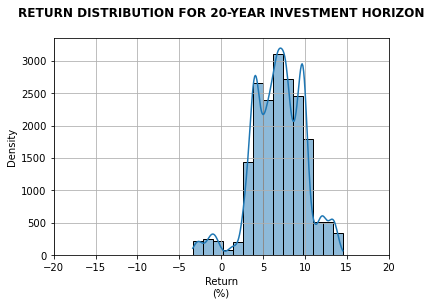

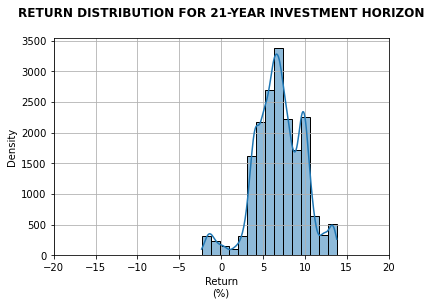

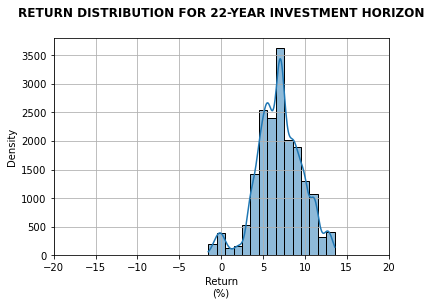

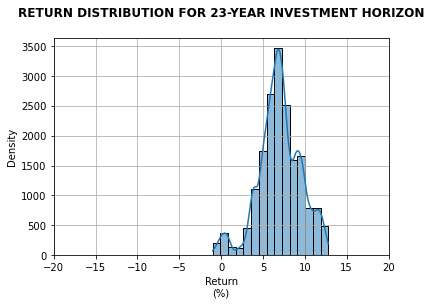

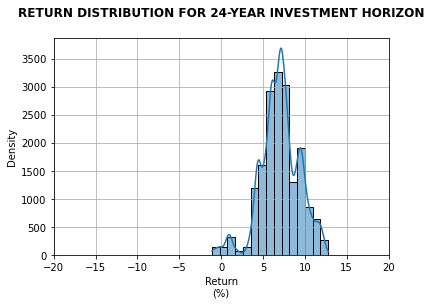

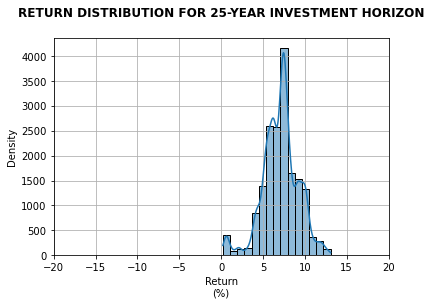

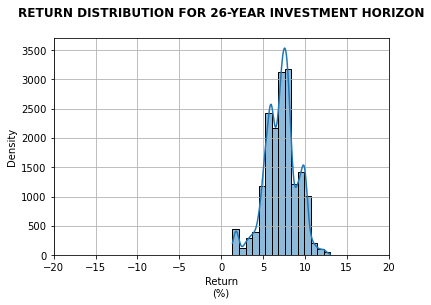

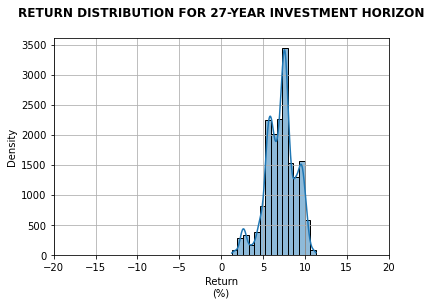

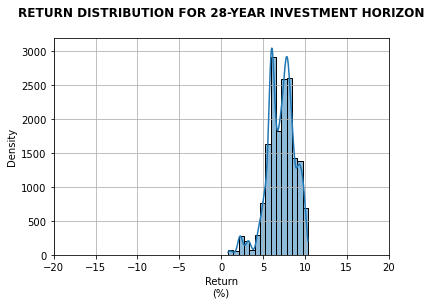

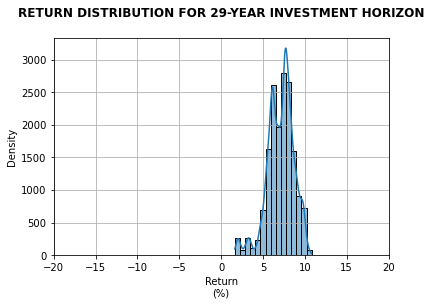

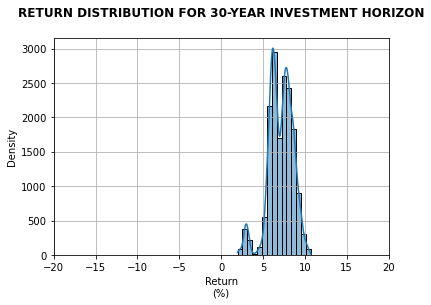

In [9]:
for i in periods:
    sns.histplot(data=df.iloc[:,i-1],bins=15,kde=True)
    # The following has impact only on graphical setup
    if (all_graph_same_limit == 'Yes') & (auto_limits == 'Yes'): plt.xlim(df.min().min(),df.max().max())
    if (all_graph_same_limit == 'Yes') & (auto_limits == 'No'): plt.xlim(x_min,x_max)    
    plt.xlabel('Return\n(%)')
    plt.ylabel('Density')
    plt.title('RETURN DISTRIBUTION FOR '+ str(periods[i-1]) + '-YEAR INVESTMENT HORIZON\n',fontweight='bold')
    plt.grid()
    plt.show()

### 2.4. Returns Versus Investment Horizon
In the graphs below the statistical info is presented as a function of intvestment horizon.

#### 2.4.1. Mean and Median Returns Versus Investment Horizon
We start reporting ___Mean___ and ___Median Returns___ as a function of investment horizon. For both Mean and Median, high returns are detected for short timeframe (1 or 2 years), followed by an immediate drop in terms of returns. As the horizon increases, the returns tend to before more stable, and sligtly increased for the long-term (20 to 30) years. This is also confirm the common assumption that the market historical return, on average, 7% before inflation.

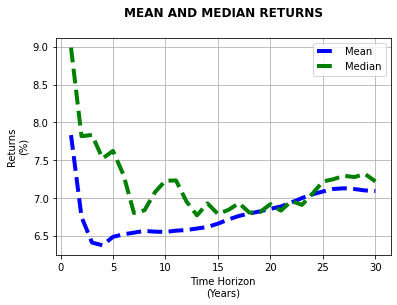

In [10]:
plt.plot(periods,df.mean(),'--',color='blue',linewidth=4)
plt.plot(periods,df.median(),'--',color='green',linewidth=4)
plt.legend(['Mean','Median'])
plt.title('MEAN AND MEDIAN RETURNS\n',fontweight='bold')
plt.xlabel('Time Horizon\n(Years)')
plt.ylabel('Returns\n(%)')
plt.grid()
plt.show()

#### 2.4.2. Mean and Variation of Returns Versus Investment Horizon
Even if the historical returns are in the neighborhood of 7.5%, when the variability is taken into account, a more informative picture is provided. In the following graph, in addition to the average (mean) returns, the variation in terms of (1) and (2) times the standard deviation (STD) is also reported.

The following conclusions can be drawn:

- For short investment horizons, average returns of 7% are accompanied by a huge variability. When the mean +/- two times the standard deviation is considered, we experience a -30%- to +40% variation.

- As time horizon increases, the variation range drops drastically, and the longer the investment time frame the lower the variability range.

- Assuming a (_Mean - 2 x STD_) as a proxy for the worst (reasonably) expected scenario, we can see a non-negative return only starting from 20-year horizon. In other words, if we select a 20-year horizon, even if we picked a "bad day", we still see that the (_Mean - 2 x STD_) is positive, increasing the chances of not having a losing investment (not considering inflation).

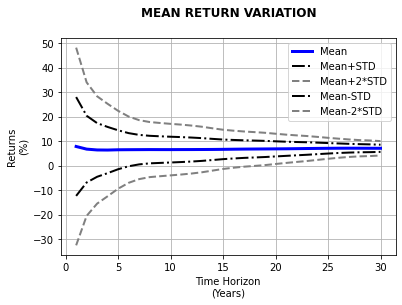

In [12]:
plt.plot(periods,df.mean(),color='blue',linewidth=3)
plt.plot(periods,df.mean()+1*df.std(),'-.',color='black',linewidth=2)
plt.plot(periods,df.mean()+2*df.std(),'--',color='grey',linewidth=2)
plt.plot(periods,df.mean()-1*df.std(),'-.',color='black',linewidth=2)
plt.plot(periods,df.mean()-2*df.std(),'--',color='grey',linewidth=2)
plt.legend(['Mean','Mean+STD','Mean+2*STD','Mean-STD','Mean-2*STD'])
plt.title('MEAN RETURN VARIATION\n',fontweight='bold')
plt.xlabel('Time Horizon\n(Years)')
plt.ylabel('Returns\n(%)')
plt.grid()
plt.show()

#### 2.4.3. Mean and Extreme Returns Versus Investment Horizon
In the following graph, mean and mean +/- STD are still reported for reference. In addition, also _Maximum_ and _Minimum_ of the range for each time horizon are reported. It is clear that, for short investment periods, very high but also very low return are expected. The distribution of the returns previously reported provide a more detailed picture.

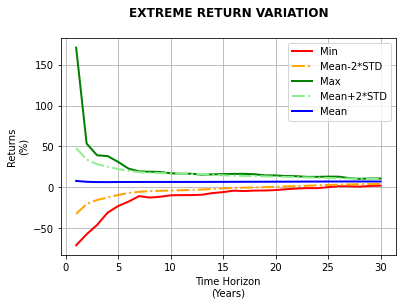

In [13]:
plt.plot(periods,df.min(),'-',color='red',linewidth=2)
plt.plot(periods,df.mean()-2*df.std(),'-.',color='orange',linewidth=2)
plt.plot(periods,df.max(),'-',color='green',linewidth=2)
plt.plot(periods,df.mean()+2*df.std(),'-.',color='lightgreen',linewidth=2)
plt.plot(periods,df.mean(),color='blue',linewidth=2)
plt.legend(['Min','Mean-2*STD','Max','Mean+2*STD','Mean'])
plt.title('EXTREME RETURN VARIATION\n',fontweight='bold')
plt.xlabel('Time Horizon\n(Years)')
plt.ylabel('Returns\n(%)')
plt.grid()
plt.show()

Below, the _Maximum returns_ (numerical values) are reported. As seen before, the long term investment tend to "stabilize" returns.

In [14]:
print('Maximum Returns:')
df.max()

Maximum Returns:


Ann. Return for 1-y period     171.111107
Ann. Return for 2-y period      53.519318
Ann. Return for 3-y period      39.213459
Ann. Return for 4-y period      38.271165
Ann. Return for 5-y period      31.086808
Ann. Return for 6-y period      22.845980
Ann. Return for 7-y period      19.537302
Ann. Return for 8-y period      19.125816
Ann. Return for 9-y period      18.766219
Ann. Return for 10-y period     17.165149
Ann. Return for 11-y period     16.642741
Ann. Return for 12-y period     16.646999
Ann. Return for 13-y period     15.320250
Ann. Return for 14-y period     15.865349
Ann. Return for 15-y period     16.187857
Ann. Return for 16-y period     16.438870
Ann. Return for 17-y period     16.485852
Ann. Return for 18-y period     16.035632
Ann. Return for 19-y period     14.619931
Ann. Return for 20-y period     14.543652
Ann. Return for 21-y period     13.823386
Ann. Return for 22-y period     13.585707
Ann. Return for 23-y period     12.797920
Ann. Return for 24-y period     12

Below, the _Minimum returns_ (numerical values) are reported. As seen before, the long term investment tend to "stabilize" returns, but the finding is that for investment horizons equal or greater that 25 year, the historical data does not report any negative returns (without considering inflation).

In [15]:
print('Minimum Returns:')
df[df<0].min() # Min of positive values, if NaN it means there are no negative values

Minimum Returns:


Ann. Return for 1-y period    -71.074919
Ann. Return for 2-y period    -57.517555
Ann. Return for 3-y period    -46.034405
Ann. Return for 4-y period    -31.033830
Ann. Return for 5-y period    -22.936772
Ann. Return for 6-y period    -17.473374
Ann. Return for 7-y period    -10.776023
Ann. Return for 8-y period    -12.599151
Ann. Return for 9-y period    -11.617546
Ann. Return for 10-y period    -9.799998
Ann. Return for 11-y period    -9.603626
Ann. Return for 12-y period    -9.521775
Ann. Return for 13-y period    -9.120003
Ann. Return for 14-y period    -7.080594
Ann. Return for 15-y period    -5.908078
Ann. Return for 16-y period    -4.096505
Ann. Return for 17-y period    -4.611668
Ann. Return for 18-y period    -4.031558
Ann. Return for 19-y period    -3.896935
Ann. Return for 20-y period    -3.383442
Ann. Return for 21-y period    -2.322775
Ann. Return for 22-y period    -1.535991
Ann. Return for 23-y period    -1.005584
Ann. Return for 24-y period    -1.093992
Ann. Return for 

## 3. Returns Grouped by Investment Horizon (Boxplot)
In the following sections boxplot graphs are used to concisely provide statistical information at glance of the finding.


### 3.1. Returns for Nth-Decade Investment Horizon
A boxplot graph for returns ranging from 1 to 10-year investment horizon is reported. In addition, also the statistical distribution of the group is reported for comparison as well.

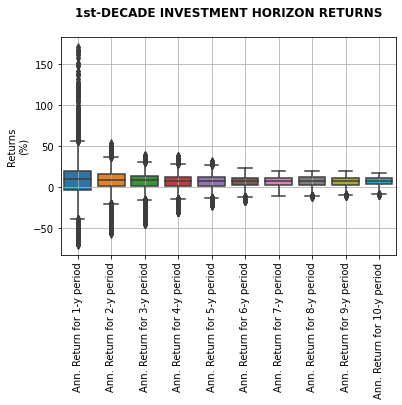

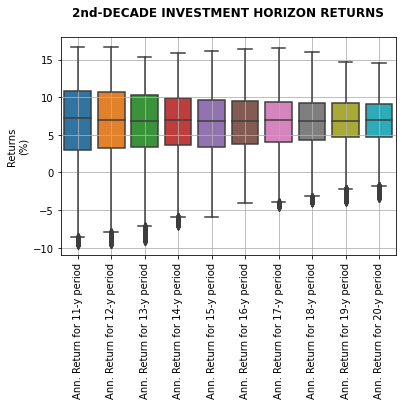

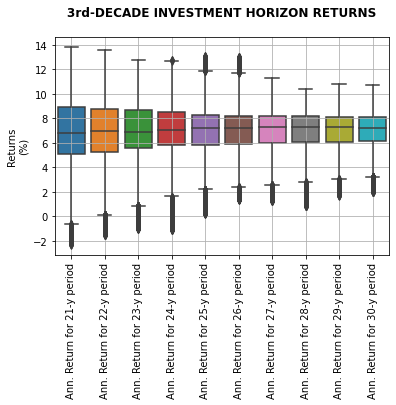

In [16]:
for i,j in enumerate(['1st','2nd','3rd']):    
    sns.boxplot(data=df.iloc[:,(i)*10:(i+1)*10])
    plt.xticks(rotation=90)
    plt.ylabel('Returns\n(%)')
    plt.title(j + '-DECADE INVESTMENT HORIZON RETURNS\n',fontweight='bold')
    plt.grid()
    plt.show()

### 3.2. Return Distributions for Nth-Decade Investment Horizon
Finally, grouped per decades, the underlining return distributions are reported below for comparison.

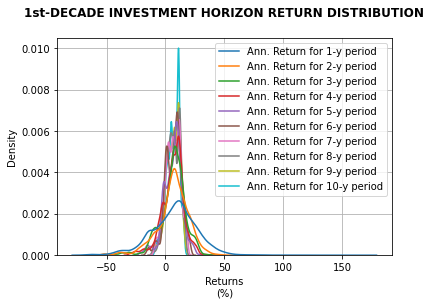

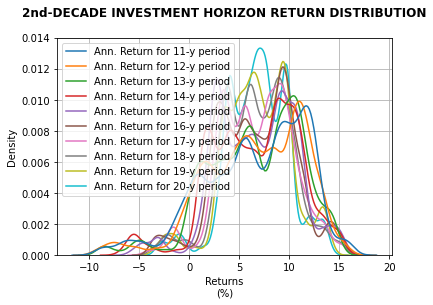

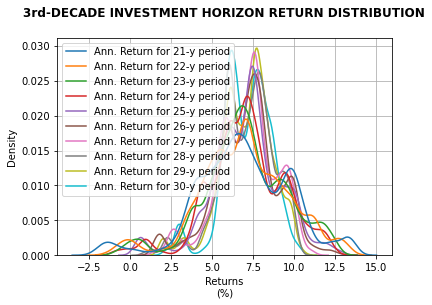

In [17]:
for i,j in enumerate(['1st','2nd','3rd']):   
    sns.kdeplot(data=df.iloc[:,(i)*10:(i+1)*10])
    plt.xlabel('Returns\n(%)')
    plt.title(j + '-DECADE INVESTMENT HORIZON RETURN DISTRIBUTION\n',fontweight='bold')
    plt.grid()
    plt.show()

## 4.0 Conclusions

### 4.1. Findings
Using historical data from _Yahoo! Finance_ (using _yfinance_ library), comparisons between annualized returns were performed for different time frames (investment horizons in years). Statistical consideration were reported to comments the results. In addition, it is worth to mention that the annualized returns were computed in a way that differed from the conventional approach.

- Common knowledge is that the market, on average, returns around 7% (annualized returns). The analysis showed that this is correct, but it does not provide any information regarding its variability.


- It was demonstrated that, when the investment time horizon increases, the returns tends to converge towards the aforementioned 7%, but the important results is that also its variation, expressed in terms of standard deviation, tend to decrease dramatically.


- What was found for the return variability, was also confirmed in terms of minimum and maximum returns. When the investment horizon increases, we can expect a smaller range of variability or, in other words, minimum and maximum values tend to converge.


- It was also found that, for horizons equal or greater than 25 years, there were no negative returns (without considering inflation) i.e. the minimum returns were always positive on the very long term.


### 4.2. Future Developments
In this study, even using different approach, the results are aligned with the common financial knowledge. Using the annualized return calculation method reported here in this analysis, the resulting distributions can be used for future perditions. 

When a time horizon is assumed, a future return of an investment can be forecasted using the associated distribution.

### 4.3. Example of Expected Return
In the following an example of how to evaluate the probability that a return will be within a defined range, using the historical data.


1. Select the ___Minimum___ and ___Maximum Expected Return___;
2. Select a ___Time horizon___ (in years);
3. The associated ___Probability Density Function (PDF)___ and ___Cumulative Density Function (CDF)___ are plot for reference;
4. The ___Probability___ that return will fall in the specified range is estimated.

In [100]:
y = 10             # Investment Horizon in years
interval_min = 5   # Minimum expected returnd for selected time horizon
interval_max = 10  # Minimum expected returnd for selected time horizon

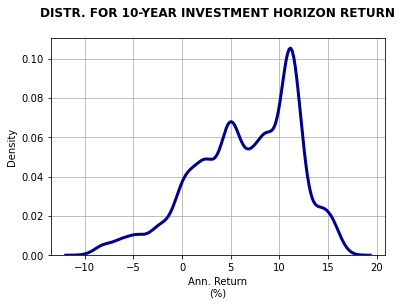

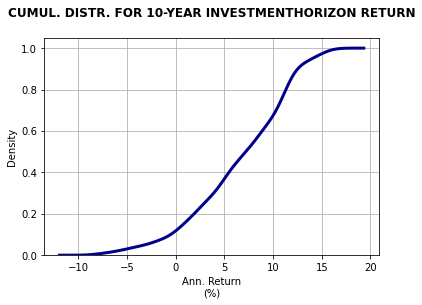

In [101]:
sns.kdeplot(data=df.iloc[:,y-1], cumulative=False, common_norm=False,linewidth=3,color='darkblue')
plt.title('DISTR. FOR '+ str(y) + '-YEAR INVESTMENT HORIZON RETURN\n',fontweight='bold')
plt.xlabel('Ann. Return\n(%)')
plt.grid()
plt.show()

sns.kdeplot(data=df.iloc[:,y-1], cumulative=True, common_norm=False,linewidth=3,color='darkblue')
plt.title('CUMUL. DISTR. FOR '+ str(y) + '-YEAR INVESTMENTHORIZON RETURN\n',fontweight='bold')
plt.xlabel('Ann. Return\n(%)')
plt.grid()
plt.show()

In [102]:
# Since the distribution is an empirical one, cumulative probability distribtuion is calculated as shown:
# Using min and max of interval and a 0.1% step, number of bins is estimated
bin_no = int((df.iloc[:,y-1].max() - df.iloc[:,y-1].min()) /0.1)
# "h" is the value per bin, "b: are the bin ranges
h,b = np.histogram(df.iloc[:,y-1].dropna(), # Histogram on date for specified time horizon, NaN values are removed
                   bins=bin_no,             # Estimated number of bins based on range
                   density=True)            # Normalized

cb = (b[1:]+b[0:-1])/2  # Center of each bin
da = (b[1:]-b[0:-1])*h  # Delta Area of each bin

dist = pd.DataFrame({'x':cb,'da':da})  # DataFrame created where center of bins and related delta areas are listed
prob = dist[dist['x'] < interval_max]['da'].sum()  -  dist[dist['x'] < interval_min]['da'].sum()

# Results are printed
print('RESULTS:\n------------------------------------')
print('Return Range Lower Limit =',interval_min,'%')
print('Return Range Upper Limit =',interval_max,'%')
print('Investment Hotizon       =',y,'years')
print('Associated Probability   =',round(100*prob,1),'%')

RESULTS:
------------------------------------
Return Range Lower Limit = 5 %
Return Range Upper Limit = 10 %
Investment Hotizon       = 10 years
Associated Probability   = 29.4 %
